# Mínimos Cuadrados

## ¿Qué son?

Los mínimos cuadrados constituyen una herramienta del análisis numérico que nos permite, en base a un conjunto de datos pertenecientes a una variable dependiente y una independiente, encontrar una función algebraica que se "ajuste" mejor a las coordenadas, aproximando óptimamente a los puntos en el plano, obteniendo una curva que minimiza la dispersión entre si misma y los puntos.

## ¿Cuál es su solución?

Los mínimos cuadrados se pueden aplicar con distintas funciones para ajustar, consideramos solucionado un problema de mínimos cuadrados cuando obtenemos la función de ajuste y se grafican los datos originales contra los datos pasados por la función de ajuste. Existen distintas funciones que podemos tomar para hacer el ajuste como:
   * Línea Recta
   * Cuadrática
   * Cúbica
   * Lineal con Función
   * Cuadrática con Función


In [3]:
%matplotlib widget
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
sp.init_printing(use_latex='mathjax')
import sys
from IPython.display import Math,display

## Línea Recta:

### ¿Cómo funciona?

Los mínimos cuadrados por línea recta intentan ajustar una línea recta a varios puntos $(x_1,y_1),(x_2,y_2), ... (x_n, y_n)$ usando la ecuación $g(x) = a_0 + a_1x$

$a_0, a_1$ representan coeficientes de la intersección de la pendiente de la línea con el eje $x$

Para obtener los coeficientes y a $g(x)$ es necesario trabajar con una matriz de la siguiente manera:

$$\left( \begin{matrix} a_0 & a_1x & g(x) \\ n & \Sigma x & \Sigma y \\ \Sigma x & \Sigma x^2 & \Sigma xy \end{matrix} \right) $$

Donde n es el número de valores a ajustar, y $\Sigma$ representa la sumatoria de los valores.
### ¿Cómo lo puedo usar?

Para usar este método, hay que ejecutar la **celda** de código siguiente e ingresar primero el valor de $n$, posteriormente los valores de $x_1 ... x_n$ y los valores de $y_1 ... y_n$

In [ ]:
##### n = int(input("Ingrese el número de valores de x: "))
arr_x_lineaR = []
for i in range(n):
    val_x = float(input("Ingrese el valor de " + "x" + str(i+1) +": "))
    arr_x_lineaR.append(val_x)
arr_y_lineaR = []
for i in range(n):
    val_y = float(input("Ingrese el valor de " + "y" + str(i+1) +": "))
    arr_y_lineaR.append(val_y)
print("\nValores de x: ")
print(arr_x_lineaR)
print("\nValores de y: ")
print(arr_y_lineaR)


#n = 6
#arr_x_lineaR = [1.1, 1.9, 2.4, 4.8, 5.1, 10.5]
#arr_y_lineaR = [2.5, 2.7, 3.7, 5.2, 6.0, 8.3]

sigma_x = np.sum(arr_x_lineaR)
sigma_y = np.sum(arr_y_lineaR)
x_cuadrada = np.power(arr_x_lineaR, 2)
sigma_x_cuadrada = np.sum(x_cuadrada)
xy_mult = np.multiply(arr_x_lineaR, arr_y_lineaR)
sigma_xy = np.sum(xy_mult)

matriz_impresa = np.array([[n, sigma_x, sigma_y], [sigma_x, sigma_x_cuadrada, sigma_xy]])
print("\nCoeficientes de la matriz: ")
print(matriz_impresa)

matriz_coef = matriz_impresa.copy()
matriz_coef = np.delete(matriz_coef, 2, 1)
matriz_gx = matriz_impresa.copy()
matriz_gx = np.delete(matriz_gx, [0, 1], 1)

soluciones = np.linalg.solve(matriz_coef, matriz_gx)

a_0 = soluciones[0][0]
a_1 = soluciones[1][0]

print("El valor de a0 es: " + str(a_0))
print("El valor de a1 es: " + str(a_1))

nuevos = []
for x_vieja in arr_x_lineaR:
    elemento = a_0 + a_1*x_vieja
    nuevos.append(elemento)

for i in range(n):
    val_x_nueva = nuevos[i]
    print("El valor de x" + str(i+1) + " ajustada con g(x) es:", val_x_nueva)

fig1, ax1 = plt.subplots()
ax1.plot(arr_x_lineaR, arr_y_lineaR, 'bo', label= 'Valores originales') #puntos viejos
ax1.plot(nuevos, arr_y_lineaR, 'ro', label='Valores ajustados') #puntos nuevos
ax1.plot(nuevos, arr_y_lineaR, color='red',linewidth=1.2) #linea nueva
ax1.plot(arr_x_lineaR, arr_y_lineaR, color='blue',linewidth=1.2) #linea vieja
ax1.set_title('Mínimos Cuadrados con Línea recta', fontsize=18)
ax1.set_xlabel('x', fontsize=15)
ax1.set_ylabel('y', fontsize=15)
ax1.legend(markerfirst=False)
fig1.show();




## Cuadrática

Ingrese el número de valores de x:  3
Ingrese el valor de x1:  1
Ingrese el valor de x2:  5
Ingrese el valor de x3:  3
Ingrese el valor de y1:  4
Ingrese el valor de y2:  5
Ingrese el valor de y3:  5



Valores de x: 
[1.0, 5.0, 3.0]

Valores de y: 
[4.0, 5.0, 5.0]

Coeficientes de la matriz: 
[[3, 9.0, 35.0, 14.0], [9.0, 35.0, 153.0, 44.0], [35.0, 153.0, 707.0, 174.0]]
El valor de a0 es: 3.12499999999999
El valor de a1 es: 1.0000000000000087
El valor de a2 es: -0.1250000000000014
El valor de x1 ajustada con g(x) es: 3.999999999999997
El valor de x2 ajustada con g(x) es: 4.999999999999999
El valor de x3 ajustada con g(x) es: 5.0000000000000036


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
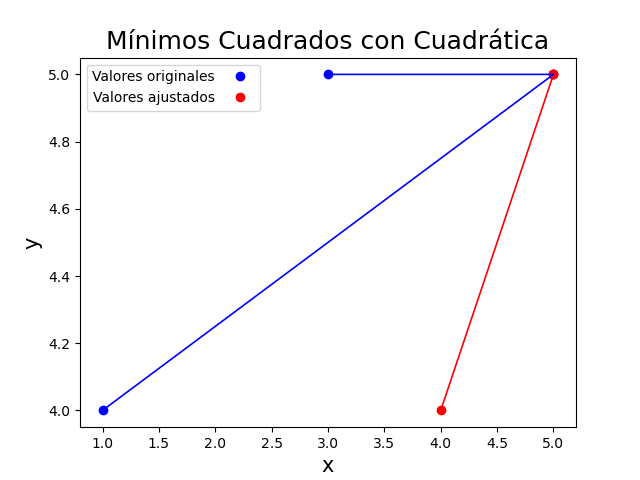

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
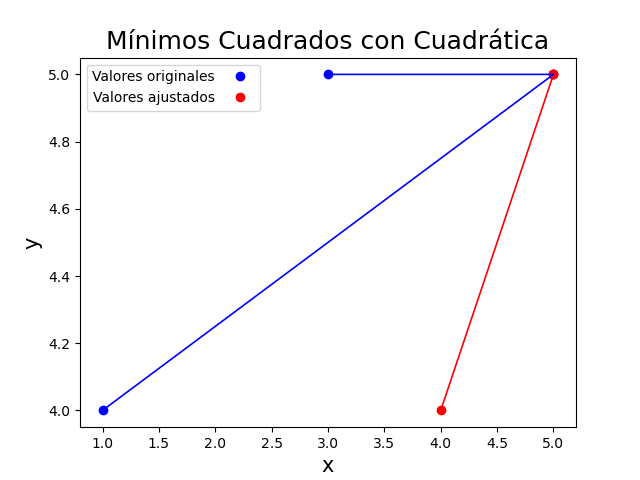

In [4]:
n = int(input("Ingrese el número de valores de x: "))
arr_x_cuad = []
for i in range(n):
    val_x = float(input("Ingrese el valor de " + "x" + str(i+1) +": "))
    arr_x_cuad.append(val_x)
arr_y_cuad = []
for i in range(n):
    val_y = float(input("Ingrese el valor de " + "y" + str(i+1) +": "))
    arr_y_cuad.append(val_y)
print("\nValores de x: ")
print(arr_x_cuad)
print("\nValores de y: ")
print(arr_y_cuad)

#n = 6
#arr_x_cuad= [1.1, 1.9, 2.4, 4.8, 5.1, 10.5]
#arr_y_cuad = [2.5, 2.7, 3.7, 5.2, 6.0, 8.3]


sigma_x_cuad = np.sum(arr_x_cuad)
sigma_y_cuad = np.sum(arr_y_cuad)
x_cuadrada_cuad = np.power(arr_x_cuad, 2)
x_cubica_cuad = np.power(arr_x_cuad, 3)
x_cuarta_cuad = np.power(arr_x_cuad, 4)
sigma_x_cuadrada_cuad = np.sum(x_cuadrada_cuad)
sigma_x_cubica_cuad = np.sum(x_cubica_cuad)
sigma_x_cuarta_cuad = np.sum(x_cuarta_cuad)
xy_mult_cuad = np.multiply(arr_x_cuad, arr_y_cuad)
x2y_mult_cuad = np.multiply(x_cuadrada_cuad, arr_y_cuad)
sigma_xy_cuad = np.sum(xy_mult_cuad)
sigma_x2y_cuad = np.sum(x2y_mult_cuad)

matriz_impresa = ([[n, sigma_x_cuad, sigma_x_cuadrada_cuad, sigma_y_cuad], [sigma_x_cuad, sigma_x_cuadrada_cuad, sigma_x_cubica_cuad, sigma_xy_cuad],
                  [sigma_x_cuadrada_cuad, sigma_x_cubica_cuad, sigma_x_cuarta_cuad, sigma_x2y_cuad]])

print("\nCoeficientes de la matriz: ")
print(matriz_impresa)

matriz_coef = matriz_impresa.copy()
matriz_coef = np.delete(matriz_coef, 3, 1)
matriz_gx = matriz_impresa.copy()
matriz_gx = np.delete(matriz_gx, [0, 2], 1)

soluciones = np.linalg.solve(matriz_coef, matriz_gx)

a_0 = soluciones[0][1]
a_1 = soluciones[1][1]
a_2 = soluciones[2][1]

print("El valor de a0 es: " + str(a_0))
print("El valor de a1 es: " + str(a_1))
print("El valor de a2 es: " + str(a_2))

nuevos_cuad = []
for x_vieja in arr_x_cuad:
    elemento = a_0 + (a_1*x_vieja) + (a_2*(np.power(x_vieja, 2)))
    nuevos_cuad.append(elemento)

for i in range(n):
    val_x_nueva = nuevos_cuad[i]
    print("El valor de x" + str(i+1) + " ajustada con g(x) es:", val_x_nueva)

fig2,ax2 = plt.subplots()
ax2.plot(arr_x_cuad, arr_y_cuad, 'bo', label= 'Valores originales') #puntos viejos
ax2.plot(nuevos_cuad, arr_y_cuad, 'ro', label='Valores ajustados') #puntos nuevos
ax2.plot(nuevos_cuad, arr_y_cuad, color='red',linewidth=1.2) #linea nueva
ax2.plot(arr_x_cuad, arr_y_cuad, color='blue',linewidth=1.2) #linea vieja
ax2.set_title('Mínimos Cuadrados con Cuadrática', fontsize=18)
ax2.set_xlabel('x', fontsize=15)
ax2.set_ylabel('y', fontsize=15)
ax2.legend(markerfirst=False)
fig2.show();

## Cúbica

Ingrese el número de valores de x:  3
Ingrese el valor de x1:  2
Ingrese el valor de x2:  24
Ingrese el valor de x3:  5
Ingrese el valor de y1:  3
Ingrese el valor de y2:  4
Ingrese el valor de y3:  2



Valores de x: 
[2.0, 24.0, 5.0]

Valores de y: 
[3.0, 4.0, 2.0]

Coeficientes de la matriz: 
[[3, 31.0, 605.0, 13957.0, 9.0], [31.0, 605.0, 13957.0, 332417.0, 112.0], [605.0, 13957.0, 332417.0, 7965781.0, 2366.0], [13957.0, 332417.0, 7965781.0, 191118665.0, 55570.0]]
[[-1.74509754e-01 -1.33828101e-01  2.69951275e+00]
 [ 1.12942807e+00  9.92558413e-02  3.92279238e-01]
 [-2.25408433e-02  9.82713870e-01 -1.30738773e-01]
 [ 7.27123976e-04  5.57617086e-04  4.86048315e-03]]
El valor de a0 es: 2.6995127521778772
El valor de a1 es: 0.3922792383069819
El valor de a2 es: -0.13073877349759644
El valor de a3 es: 0.004860483149816993
El valor de x1 ajustada con g(x) es: 2.9999999999999916
El valor de x2 ajustada con g(x) es: 4.000000000000007
El valor de x3 ajustada con g(x) es: 2.0


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
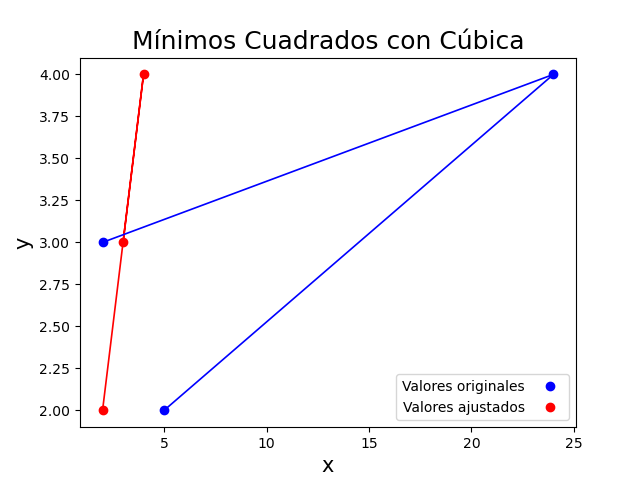

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
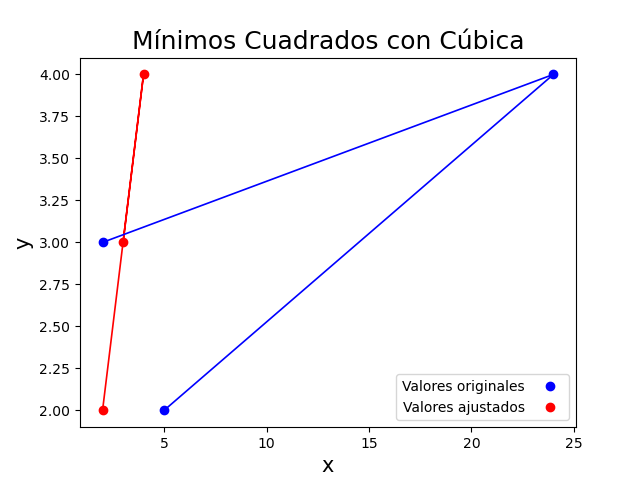

In [5]:
n = int(input("Ingrese el número de valores de x: "))
arr_x_cub = []
for i in range(n):
    val_x = float(input("Ingrese el valor de " + "x" + str(i+1) +": "))
    arr_x_cub.append(val_x)
arr_y_cub = []
for i in range(n):
    val_y = float(input("Ingrese el valor de " + "y" + str(i+1) +": "))
    arr_y_cub.append(val_y)
print("\nValores de x: ")
print(arr_x_cub)
print("\nValores de y: ")
print(arr_y_cub)


#n = 6
#arr_x_cub= [1.1, 1.9, 2.4, 4.8, 5.1, 10.5]
#arr_y_cub = [2.5, 2.7, 3.7, 5.2, 6.0, 8.3]


sigma_x_cub = np.sum(arr_x_cub)
sigma_y_cub = np.sum(arr_y_cub)
x_cuadrada_cub = np.power(arr_x_cub, 2)
x_cubica_cub = np.power(arr_x_cub, 3)
x_cuarta_cub = np.power(arr_x_cub, 4)
x_quinta_cub = np.power(arr_x_cub, 5)
x_sexta_cub = np.power(arr_x_cub, 6)
sigma_x_cuadrada_cub = np.sum(x_cuadrada_cub)
sigma_x_cubica_cub = np.sum(x_cubica_cub)
sigma_x_cuarta_cub = np.sum(x_cuarta_cub)
sigma_x_quinta_cub = np.sum(x_quinta_cub)
sigma_x_sexta_cub = np.sum(x_sexta_cub)
xy_mult_cub = np.multiply(arr_x_cub, arr_y_cub)
x2y_mult_cub = np.multiply(x_cuadrada_cub, arr_y_cub)
x3y_mult_cub = np.multiply(x_cubica_cub, arr_y_cub)
sigma_xy_cub = np.sum(xy_mult_cub)
sigma_x2y_cub = np.sum(x2y_mult_cub)
sigma_x3y_cub = np.sum(x3y_mult_cub)

matriz_impresa = ([[n, sigma_x_cub, sigma_x_cuadrada_cub, sigma_x_cubica_cub, sigma_y_cub],
                    [sigma_x_cub, sigma_x_cuadrada_cub, sigma_x_cubica_cub, sigma_x_cuarta_cub,sigma_xy_cub],
                    [sigma_x_cuadrada_cub, sigma_x_cubica_cub, sigma_x_cuarta_cub, sigma_x_quinta_cub, sigma_x2y_cub],
                    [sigma_x_cubica_cub, sigma_x_cuarta_cub, sigma_x_quinta_cub, sigma_x_sexta_cub, sigma_x3y_cub]])

print("\nCoeficientes de la matriz: ")
print(matriz_impresa)

matriz_coef = matriz_impresa.copy()
matriz_coef = np.delete(matriz_coef, 4, 1)
matriz_gx = matriz_impresa.copy()
matriz_gx = np.delete(matriz_gx, [0, 3], 1)

soluciones = np.linalg.solve(matriz_coef, matriz_gx)
print(soluciones)


a_0 = soluciones[0][2]
a_1 = soluciones[1][2]
a_2 = soluciones[2][2]
a_3 = soluciones[3][2]

print("El valor de a0 es: " + str(a_0))
print("El valor de a1 es: " + str(a_1))
print("El valor de a2 es: " + str(a_2))
print("El valor de a3 es: " + str(a_3))

nuevos_cub = []
for x_vieja in arr_x_cub:
    elemento = a_0 + (a_1*x_vieja) + (a_2*(np.power(x_vieja, 2))) + (a_3*(np.power(x_vieja, 3)))
    nuevos_cub.append(elemento)

for i in range(n):
    val_x_nueva = nuevos_cub[i]
    print("El valor de x" + str(i+1) + " ajustada con g(x) es:", val_x_nueva)
fig3,ax3=plt.subplots()
ax3.plot(arr_x_cub, arr_y_cub, 'bo', label= 'Valores originales') #puntos viejos
ax3.plot(nuevos_cub, arr_y_cub, 'ro', label='Valores ajustados') #puntos nuevos
ax3.plot(nuevos_cub, arr_y_cub, color='red',linewidth=1.2) #linea nueva
ax3.plot(arr_x_cub, arr_y_cub, color='blue',linewidth=1.2) #linea vieja
ax3.set_title('Mínimos Cuadrados con Cúbica', fontsize=18)
ax3.set_xlabel('x', fontsize=15)
ax3.set_ylabel('y', fontsize=15)
ax3.legend(markerfirst=False)
fig3.show();

## Lineal con función


In [ ]:
x, y, z = sp.symbols("x y z")
n = int(input("Ingrese el número de valores de x: "))
arr_x_lineaF = []
for i in range(n):
    val_x = float(input("Ingrese el valor de " + "x" + str(i+1) +": "))
    arr_x_lineaF.append(val_x)
arr_y_lineaF = []
for i in range(n):
    val_y = float(input("Ingrese el valor de " + "y" + str(i+1) +": "))
    arr_y_lineaF.append(val_y)
print("\nValores de x: ")
print(arr_x_lineaF)
print("\nValores de y: ")
print(arr_y_lineaF)


dict_funciones = {'1': 'e^x', '2': 'sin(x)', '3': 'cos(x)', '4': 'tan(x)', '5':'ln(x)'}
for funcion in dict_funciones.values():
    display(Math(funcion))

decision = input("Ingrese el número de la función que desea usar")
dict_funciones['1'] = 'exp(x)'
dict_funciones['5'] = 'log(x)'
funcion_usar = dict_funciones.get(decision)
funcion_sim_usar = sp.sympify(funcion_usar)
funcion_np_usar = sp.lambdify(x, funcion_sim_usar, 'numpy')

sigma_x = np.sum(arr_x_lineaF)
sigma_y = np.sum(arr_y_lineaF)
x_cuadrada = np.power(arr_x_lineaF, 2)
x_funcion = funcion_np_usar(arr_x_lineaF)
sigma_x_fun = np.sum(x_funcion)
x2_funcion = funcion_np_usar(x_cuadrada)
sigma_x2_fun = np.sum(x2_funcion)
x_por_funcionx = np.multiply(arr_x_lineaF, x_funcion)
sigma_x_porfunx = np.sum(x_por_funcionx)
y_por_funcion_x = np.multiply(arr_y_lineaF, x_funcion)
sigma_yporfunx = np.sum(y_por_funcion_x)
sigma_x_cuadrada = np.sum(x_cuadrada)
xy_mult = np.multiply(arr_x_lineaF, arr_y_lineaF)
sigma_xy = np.sum(xy_mult)

matriz_imprimir_lineaF = ([[n, sigma_x, sigma_x_fun, sigma_y], [sigma_x, sigma_x_cuadrada, sigma_x_porfunx, sigma_xy], [sigma_x_fun, sigma_x_porfunx, sigma_x2_fun, sigma_yporfunx]])
print("Los coeficientes de la matriz son: ")
print(matriz_imprimir_lineaF)
matriz_coef = matriz_imprimir_lineaF.copy()
matriz_coef = np.delete(matriz_coef, 3, 1)
matriz_gx = matriz_imprimir_lineaF.copy()
matriz_gx = np.delete(matriz_gx, [0,2],1)

soluciones = np.linalg.solve(matriz_coef, matriz_gx)
a_0 = soluciones[0][1]
a_1 = soluciones[1][1]
a_2 = soluciones[2][1]

if a_0 < 1e-8:
    a_0 = 0
elif a_1 < 1e-8:
    a_1 = 0
elif a_2 < 1e-8:
    a_2 = 0

print("El valor de a0 es: " + str(a_0))
print("El valor de a1 es: " + str(a_1))
print("El valor de a2 es: " + str(a_2))
nuevos_linF = []
for x_vieja in arr_x_lineaF:
    elemento = a_0 + (a_1*x_vieja) + (a_2*(funcion_np_usar(x_vieja)))
    nuevos_linF.append(elemento)

for i in range(n):
    val_x_nueva = nuevos_linF[i]
    print("El valor de x" + str(i+1) + " ajustada con g(x) es:", val_x_nueva)
fig4,ax4=plt.subplots()
ax4.plot(arr_x_lineaF, arr_y_lineaF, 'bo', label= 'Valores originales') #puntos viejos
ax4.plot(nuevos_linF, arr_y_lineaF, 'ro', label='Valores ajustados') #puntos nuevos
ax4.plot(nuevos_linF, arr_y_lineaF, color='red',linewidth=1.2) #linea nueva
ax4.plot(arr_x_lineaF, arr_y_lineaF, color='blue',linewidth=1.2) #linea vieja
ax4.set_title('Mínimos Cuadrados con Lineal con función', fontsize=18)
ax4.set_xlabel('x', fontsize=15)
ax4.set_ylabel('y', fontsize=15)
ax4.legend(markerfirst=False)
fig4.show();






## Cuadrática con Funcion

In [ ]:
x, y, z = sp.symbols("x y z")
n = int(input("Ingrese el número de valores de x: "))
arr_x_cuadF = []
for i in range(n):
    val_x = float(input("Ingrese el valor de " + "x" + str(i+1) +": "))
    arr_x_cuadF.append(val_x)
arr_y_cuadF = []
for i in range(n):
    val_y = float(input("Ingrese el valor de " + "y" + str(i+1) +": "))
    arr_y_cuadF.append(val_y)
print("\nValores de x: ")
print(arr_x_cuadF)
print("\nValores de y: ")
print(arr_y_cuadF)


dict_funciones = {'1': 'e^x', '2': 'sin(x)', '3': 'cos(x)', '4': 'tan(x)', '5':'ln(x)'}
for funcion in dict_funciones.values():
    display(Math(funcion))

decision = input("Ingrese el número de la función que desea usar")
dict_funciones['1'] = 'exp(x)'
dict_funciones['5'] = 'log(x)'
funcion_usar = dict_funciones.get(decision)
funcion_sim_usar = sp.sympify(funcion_usar)
funcion_np_usar = sp.lambdify(x, funcion_sim_usar, 'numpy')

sigma_x = np.sum(arr_x_cuadF)
sigma_y = np.sum(arr_y_cuadF)
x_cuadrada = np.power(arr_x_cuadF, 2)
sigma_x_cuadrada = np.sum(x_cuadrada)
x_cubica = np.power(arr_x_cuadF, 3)
sigma_x_cubica = np.sum(x_cubica)
x_cuarta = np.power(arr_x_cuadF, 4)
sigma_x_cuarta = np.sum(x_cuarta)
x_funcion = funcion_np_usar(arr_x_cuadF)
sigma_x_fun = np.sum(x_funcion)
x2_funcion = funcion_np_usar(x_cuadrada)
sigma_x2_fun = np.sum(x2_funcion)
x_por_funcionx = np.multiply(arr_x_cuadF, x_funcion)
sigma_x_porfunx = np.sum(x_por_funcionx)
y_por_funcion_x = np.multiply(arr_y_cuadF, x_funcion)
sigma_yporfunx = np.sum(y_por_funcion_x)
x2_ymult = np.multiply(x_cuadrada, arr_y_cuadF)
sigma_x2y = np.sum(x2_ymult)
x2_por_fx = np.multiply(x_cuadrada, x_funcion)
sigma_x2_por_fx = np.sum(x2_por_fx)
xy_mult = np.multiply(arr_x_cuadF, arr_y_cuadF)
sigma_xy = np.sum(xy_mult)

matriz_imprimir_cuadF = ([[n, sigma_x, sigma_x_cuadrada, sigma_x_fun, sigma_y], 
    [sigma_x, sigma_x_cuadrada, sigma_x_cubica, sigma_x_porfunx, sigma_xy], 
    [sigma_x_cuadrada, sigma_x_cubica, sigma_x_cuarta, sigma_x2_por_fx, sigma_x2y],
    [sigma_x_fun, sigma_x_porfunx, sigma_x2_por_fx, sigma_x2_fun, sigma_yporfunx]])
print("Los coeficientes de la matriz son: ")
print(matriz_imprimir_cuadF)
matriz_coef = matriz_imprimir_cuadF.copy()
matriz_coef = np.delete(matriz_coef, 4, 1)
matriz_gx = matriz_imprimir_cuadF.copy()
matriz_gx = np.delete(matriz_gx, [0,3],1)

soluciones = np.linalg.solve(matriz_coef, matriz_gx)
a_0 = soluciones[0][2]
a_1 = soluciones[1][2]
a_2 = soluciones[2][2]
a_3 = soluciones[3][2]

if a_0 < 1e-8:
    a_0 = 0
elif a_1 < 1e-8:
    a_1 = 0
elif a_2 < 1e-8:
    a_2 = 0
elif a_3 < 1e-8:
    a_3 = 0


print("El valor de a0 es: " + str(a_0))
print("El valor de a1 es: " + str(a_1))
print("El valor de a2 es: " + str(a_2))
print("El valor de a3 es: " + str(a_3))
nuevos_cuadF = []
for x_vieja in arr_x_cuadF:
    elemento = a_0 + (a_1*x_vieja) + (a_2*(np.power(x_vieja,2))) + (a_3*funcion_np_usar(x_vieja))
    nuevos_cuadF.append(elemento)

for i in range(n):
    val_x_nueva = nuevos_cuadF[i]
    print("El valor de x" + str(i+1) + " ajustada con g(x) es:", val_x_nueva)
fig5,ax5=plt.subplots()
ax5.plot(arr_x_cuadF, arr_y_cuadF, 'bo', label= 'Valores originales') #puntos viejos
ax5.plot(nuevos_cuadF, arr_y_cuadF, 'ro', label='Valores ajustados') #puntos nuevos
ax5.plot(nuevos_cuadF, arr_y_cuadF, color='red',linewidth=1.2) #linea nueva
ax5.plot(arr_x_cuadF, arr_y_cuadF, color='blue',linewidth=1.2) #linea vieja
ax5.set_title('Mínimos Cuadrados con Cuadrática con función', fontsize=18)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)
ax5.legend(markerfirst=False)
fig5.show();
